In [23]:
import numpy as np
import torch
import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
import paradime.dr
import paradime.relations
import paradime.transforms
import paradime.loss

In [9]:
diabetes = sklearn.datasets.load_diabetes()
data = diabetes['data']

In [10]:
pca = sklearn.decomposition.PCA()
pca.fit(data)

PCA()

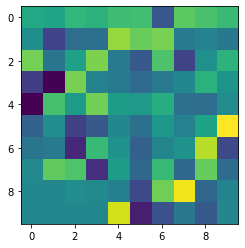

In [14]:
plt.imshow(pca.components_)

In [25]:
pd_pca = paradime.dr.ParametricDR(
    model=torch.nn.Linear(10,10,bias=False),
    verbose=True,
)
pd_pca.register_dataset({
    'data': torch.tensor(data).float(),
    'pca': torch.tensor(pca.transform(data)).float(),
})
pd_pca.add_training_phase(
    epochs=20,
    batch_size=50,
    loss=paradime.loss.PositionLoss(
        position_key='pca',
        embedding_method='forward',
    ),
    report_interval=2,
)
pd_pca.train()

2022-08-22 17:39:35,757: Registering dataset.
2022-08-22 17:39:35,761: Beginning training phase 'None'.
2022-08-22 17:39:35,774: Loss after epoch 0: 0.02204506564885378
2022-08-22 17:39:35,791: Loss after epoch 2: 0.008364640350919217
2022-08-22 17:39:35,807: Loss after epoch 4: 0.003360529663041234
2022-08-22 17:39:35,825: Loss after epoch 6: 0.0014532295026583597
2022-08-22 17:39:35,841: Loss after epoch 8: 0.0006394702577381395
2022-08-22 17:39:35,859: Loss after epoch 10: 0.00031046684307511896
2022-08-22 17:39:35,881: Loss after epoch 12: 0.00017441576164856087
2022-08-22 17:39:35,899: Loss after epoch 14: 0.00010979739454342052
2022-08-22 17:39:35,914: Loss after epoch 16: 7.448280757671455e-05
2022-08-22 17:39:35,928: Loss after epoch 18: 5.468014614962158e-05


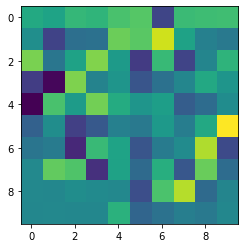

In [26]:
plt.imshow(pd_pca.model.weight.detach().numpy())

In [28]:
pd_mds = paradime.dr.ParametricDR(
    model=torch.nn.Linear(10,10,bias=False),
    global_relations=paradime.relations.PDist(),
    batch_relations=paradime.relations.DifferentiablePDist(
        transform=paradime.transforms.ToSquareTensor()
    ),
    verbose=True,
)
pd_mds.register_dataset({
    'data': torch.tensor(data).float(),
    'pca': torch.tensor(pca.transform(data)).float(),
})
pd_mds.add_training_phase(
    epochs=20,
    batch_size=50,
    loss=paradime.loss.PositionLoss(
        position_key='pca',
        embedding_method='forward',
    ),
    report_interval=2,
)
pd_mds.train()

2022-08-22 17:39:51,554: Registering dataset.
2022-08-22 17:39:51,556: Computing global relations 'rel'.
2022-08-22 17:39:51,556: Calculating pairwise distances.
2022-08-22 17:39:51,559: Beginning training phase 'None'.
2022-08-22 17:39:51,568: Loss after epoch 0: 0.02156461915001273
2022-08-22 17:39:51,584: Loss after epoch 2: 0.007532916672062129
2022-08-22 17:39:51,601: Loss after epoch 4: 0.002460842690197751
2022-08-22 17:39:51,619: Loss after epoch 6: 0.0009864325329544954
2022-08-22 17:39:51,640: Loss after epoch 8: 0.00043546914821490645
2022-08-22 17:39:51,659: Loss after epoch 10: 0.00021131278481334448
2022-08-22 17:39:51,677: Loss after epoch 12: 0.00011758679647755343
2022-08-22 17:39:51,694: Loss after epoch 14: 7.492281383747468e-05
2022-08-22 17:39:51,707: Loss after epoch 16: 5.182874883757904e-05
2022-08-22 17:39:51,724: Loss after epoch 18: 3.867164969051373e-05


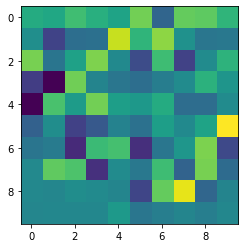

In [29]:
plt.imshow(pd_mds.model.weight.detach().numpy())

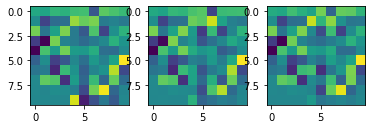

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(pca.components_)
ax2.imshow(pd_pca.model.weight.detach().numpy())
ax3.imshow(pd_mds.model.weight.detach().numpy())